<---------------------------------------------------------------------------------------------------->
橫列數: 10
直列數: 301
Channel數: 8
總共資料數: 2408
<---------------------------------------------------------------------------------------------------->


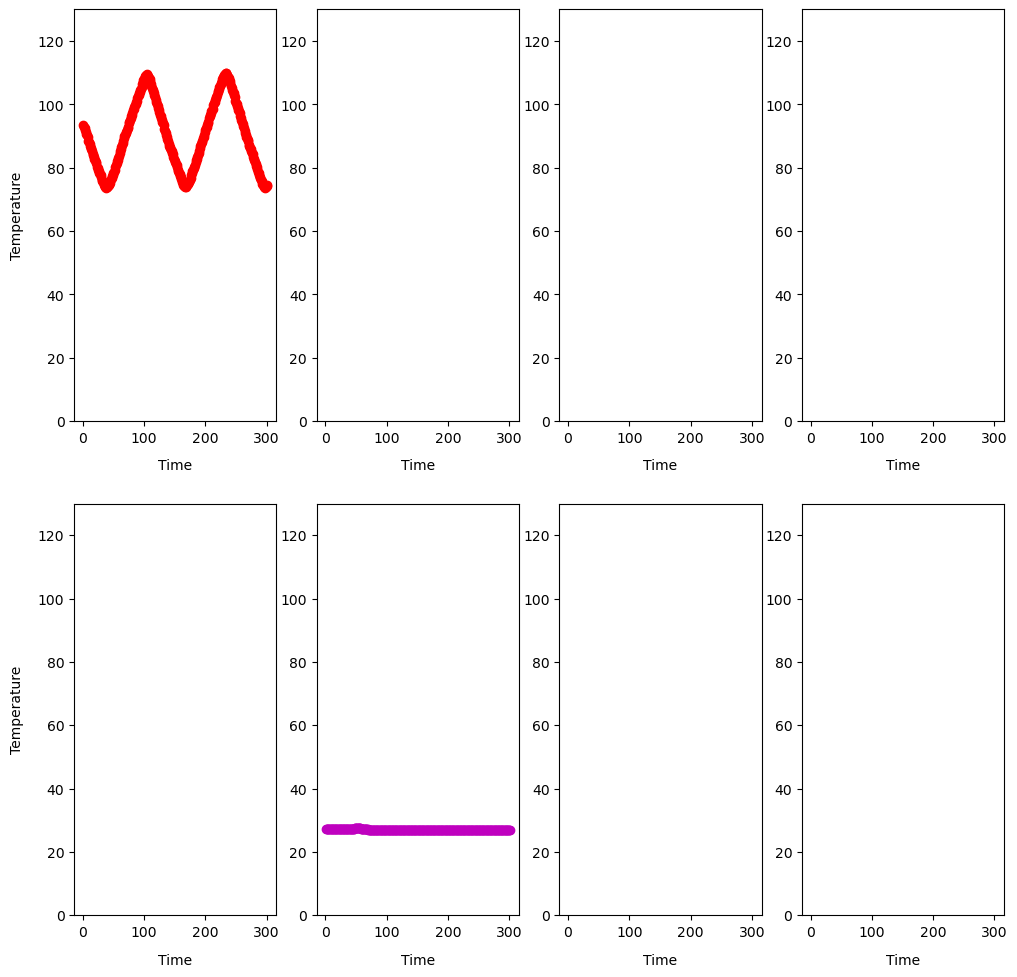

<--------------------結果-------------------->
已另存成新檔案!


In [1]:
from io import SEEK_CUR
from openpyxl.xml.constants import MAX_ROW
import csv
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import datetime
from openpyxl.worksheet.dimensions import ColumnDimension, RowDimension
import openpyxl
from datetime import datetime, timedelta
import statistics
import numpy as np
from openpyxl import load_workbook
from heapq import nsmallest



now_output_time = str(datetime.now().strftime('%Y-%m-%d %H-%M-%S'))+"output.xlsx"
wb = openpyxl.load_workbook('data/2021年10月27日.xlsx')
sh = wb['2021年10月27日']
ws = wb.active
print( "<"+'-'* 100 + ">" )
print("橫列數: " + str(sh.max_column))
print("直列數: " + str(sh.max_row))
print("Channel數: " + str(sh.max_column-2))
print("總共資料數: " + str((sh.max_column-2)*sh.max_row))
print( "<"+'-'* 100 + ">" )
#-------------------------------------------------------------------------
CH1_data = []
CH2_data = []
CH3_data = []
CH4_data = []
CH5_data = []
CH6_data = []
CH7_data = []
CH8_data = []
CH_total = [i for i in range(1,sh.max_row + 1,1)]
#-------------------------------------------------------------------------
a = sh.max_column   #a是橫
b = sh.max_row      #b是直

ws.cell(row= 1,column=a+2,value="溫度變化" )
ws.cell(row= 1,column=a+3,value="Index")
ws.cell(row= 1,column=a+a+2,value="溫度差距")
ws.cell(row= 1,column=a+2*a+2,value="T_On Mode")
ws.cell(row= 1,column=a+3*a+2,value="T_Off Mode")

for channel_num in range(1,a-1,1):
    ws.cell(row= 1,column=a+3+channel_num,value= "CH"+str(channel_num)) #a是橫 b是直
    ws.cell(row= 1,column=a+4+channel_num+8,value= "CH"+str(channel_num))
    ws.cell(row= 1,column=a+4+channel_num+8,value= "CH"+str(channel_num))
    ws.cell(row= 1,column=a+4+channel_num+8,value= "CH"+str(channel_num))
    channel_gap = []
    channel_T_On = []

    for channel_data in range(1,b+1,1):
        num_1 = ws.cell(row = channel_data + 1,column=a+3+channel_num).value = ws.cell(row = channel_data,column= a-8+channel_num).value
        if channel_num == 1:
            CH1_data.append(num_1)
        if channel_num == 2:
            CH2_data.append(num_1)
        if channel_num == 3:
            CH3_data.append(num_1)
        if channel_num == 4:
            CH4_data.append(num_1)
        if channel_num == 5:
            CH5_data.append(num_1)
        if channel_num == 6:
            CH6_data.append(num_1)
        if channel_num == 7:
            CH7_data.append(num_1)
        if channel_num == 8:
            CH8_data.append(num_1) 


    i = len(channel_gap) - 1
    channel_T_On = [ data_gap for data_gap in channel_gap if data_gap > 0]

# 把資料放進來並指定對應的X軸、Y軸的資料 用圓形做標記(o-)，並指定線條顏色為綠色、使用label標記線條含意
plt.figure(figsize=(12,12),dpi=100,linewidth = 1)
#Channel1
plt.subplot(241)          
plt.plot(CH_total,CH1_data,'o-',color = 'red', label="CH1_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylabel("Temperature", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH1.jpg')

#Channel2
plt.subplot(242)  
plt.plot(CH_total,CH2_data,'o--',color = 'orange', label="CH2_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH2.jpg')

#Channel3
plt.subplot(243) 
plt.plot(CH_total,CH3_data,'o-',color = 'yellow', label="CH3_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH3.jpg')

#Channel4
plt.subplot(244) 
plt.plot(CH_total,CH4_data,'o-',color = 'green', label="CH4_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH4.jpg')

#Channel5
plt.subplot(245) 
plt.plot(CH_total,CH5_data,'o-',color = '#6F00FF', label="CH5_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylabel("Temperature", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH5.jpg')

#Channel6
plt.subplot(246) 
plt.plot(CH_total,CH6_data,'o-',color = 'm', label="CH6_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH6.jpg')

#Channel7
plt.subplot(247) 
plt.plot(CH_total,CH7_data,'o-',color = 'purple', label="CH7_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH7.jpg')

#Channel8
plt.subplot(248) 
plt.plot(CH_total,CH8_data,'o-',color = 'k', label="CH8_data")
plt.xlabel("Time", fontsize=10, labelpad = 10)
plt.ylim(0,sh.max_row)
plt.ylim(0,130)
plt.savefig('img/CH8.jpg')

plt.show()

#另存成新的CSV檔案
try:
    print("<"+"-" * 20 + "結果" +"-" * 20 +">")
    wb.save("xlsx/every/Every_"+now_output_time)
    print('已另存成新檔案!')
except:
    print("失敗並且確認資料格式是否出錯!")